In [1]:
from discopy import Functor, Ty, Word, Id, Cup, Diagram

s, n = Ty('s'), Ty('n')
tv = n.r @ s @ n.l
iv = n.r @ s
p = s.r @ n.r.r @ n.r @ s @ n.l

vocab = {
    n: ["dog", "cat", "mouse", "fox", "chicken", "grain", "cheese", "bone", "fish", "whale", "seal", "krill", "water", "land"],
    tv: ["chases", "flees", "bites", "eats"],
    iv: ["barks", "meows", "squeaks", "clucks", "chases", "runs", "swims"],
     p: ["at", "after", "in", "on"]
}

# grammars
grammars = [Cup(n, n.r) @ Id(s),
            Cup(n, n.r) @ Id(s) @ Cup(n.l, n),
            (Id(n) @ Id(n.r) @ Cup(s, s.r) @ Id(n.r.r) @ Id(n.r) >> Id(n) @ Cup(n.r, n.r.r) @ Id(n.r) >> Cup(n, n.r)) @ Id(s) @ Cup(n.l, n)]


In [2]:
class WordBox(Word):
    """ Word with Ty((name, cod)) as domain. """
    def __init__(self, name, cod):
        super().__init__(name, cod, dom=Ty())


In [18]:
subj_box = WordBox('dog', n)
verb_box = WordBox('chases', tv)
dobj_box = WordBox('cat', n)
diagram = subj_box @ verb_box @ dobj_box >> grammars[1]

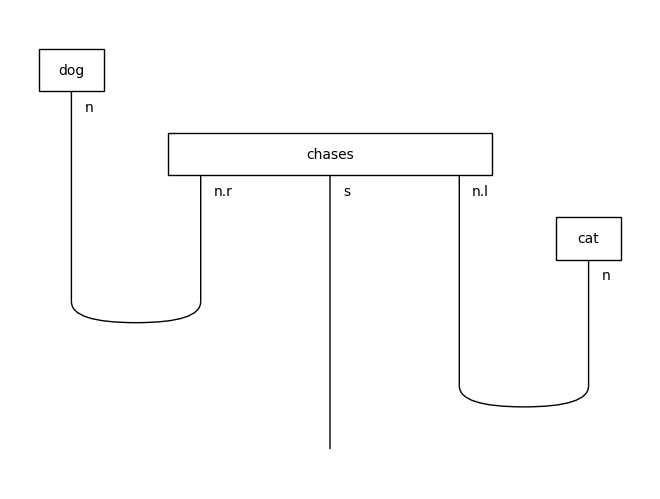

In [20]:
diagram.draw()

In [14]:
from lambeq import BobcatParser
parser = BobcatParser()
parser.sentence2diagram('dog chases cat')

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('dog', Ty('n')), Word('chases', Ty(Ob('n', z=1), 's', Ob('n', z=-1))), Word('cat', Ty('n')), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1)))], offsets=[0, 1, 4, 3, 0])

In [23]:
from lambeq import AtomicType, IQPAnsatz
qubit_map = {t: 1 for t in AtomicType}
N = AtomicType.NOUN
S = AtomicType.SENTENCE
P = AtomicType.PREPOSITIONAL_PHRASE
ansatz = IQPAnsatz(ob_map={N: 1, S: 1, P:1},
                   n_layers=1, n_single_qubit_params=3)

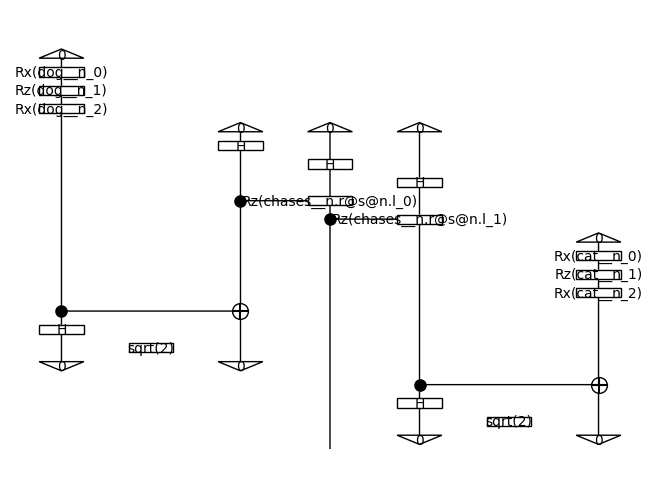

In [24]:
ansatz(diagram).draw()

In [5]:
from lambeq import BobcatParser
parser = BobcatParser(verbose='text')

In [3]:
# this sample data is found in folder data
def read_raw_data(filename):
    raw_data = []
    with open(filename) as f:
        for line in f:
            raw_data.append((line[:-2], line[-2]))
    return raw_data
raw_train_data = read_raw_data('data/bin_class_86_train_data.txt')
raw_dev_data = read_raw_data('data/bin_class_86_dev_data.txt')
#raw_test_data = read_raw_data('data/bin_class_23_test_data.txt')

In [28]:
l=[]

In [29]:
from nltk import word_tokenize
for tup in raw_train_data:
    sen = tup[0]
    tokenized_sen = word_tokenize(sen)
    lenght = len(tokenized_sen)
    if lenght == 2:
        subj_box = WordBox(tokenized_sen[0], n)
        verb_box = WordBox(tokenized_sen[1], iv)
        diagram = subj_box @ verb_box >> grammars[0]
    elif lenght == 3:
        subj_box = WordBox(tokenized_sen[0], n)
        verb_box = WordBox(tokenized_sen[1], tv)
        dobj_box = WordBox(tokenized_sen[2], n)
        diagram = subj_box @ verb_box @ dobj_box >> grammars[1]
    else:
        subj_box = WordBox(tokenized_sen[0], n)
        verb_box = WordBox(tokenized_sen[1], iv)
        prep_box = WordBox(tokenized_sen[2], p)
        idobj_box = WordBox(tokenized_sen[3], n)
        diagram = subj_box @ verb_box @ prep_box @ idobj_box >> grammars[2]
    l.append(diagram)

In [30]:
def parse(dataset):
    diagram_list = []
    for tup in dataset:
        sen = tup[0]
        tokenized_sen = word_tokenize(sen)
        lenght = len(tokenized_sen)
        if lenght == 2:
            subj_box = WordBox(tokenized_sen[0], n)
            verb_box = WordBox(tokenized_sen[1], iv)
            diagram = subj_box @ verb_box >> grammars[0]
        elif lenght == 3:
            subj_box = WordBox(tokenized_sen[0], n)
            verb_box = WordBox(tokenized_sen[1], tv)
            dobj_box = WordBox(tokenized_sen[2], n)
            diagram = subj_box @ verb_box @ dobj_box >> grammars[1]
        else:
            subj_box = WordBox(tokenized_sen[0], n)
            verb_box = WordBox(tokenized_sen[1], iv)
            prep_box = WordBox(tokenized_sen[2], p)
            idobj_box = WordBox(tokenized_sen[3], n)
            diagram = subj_box @ verb_box @ prep_box @ idobj_box >> grammars[2]
        diagram_list.append(diagram)
    return diagram_list

86